In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4494,0225-ZORZP,Male,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.7,No
2213,5197-YPYBZ,Female,0,Yes,Yes,12,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.25,274.7,No
1846,7369-TRPFD,Male,0,No,No,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,279.2,No
2049,1170-SASML,Female,0,Yes,No,69,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.40,5869.4,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [7]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\huyho\AppData\Local\Temp\ipykernel_12460\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [9]:
df1.TotalCharges.dtypes

dtype('float64')

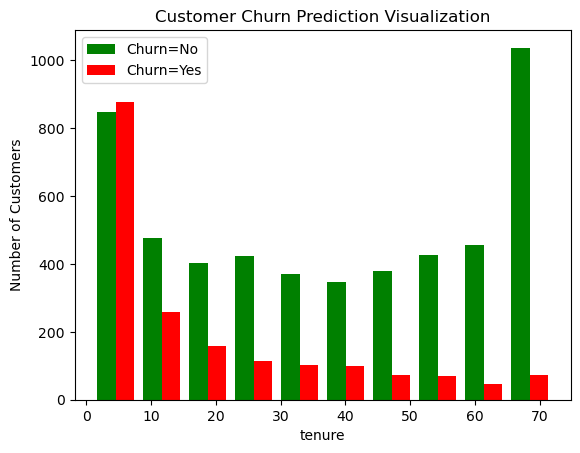

In [10]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()                                                                         

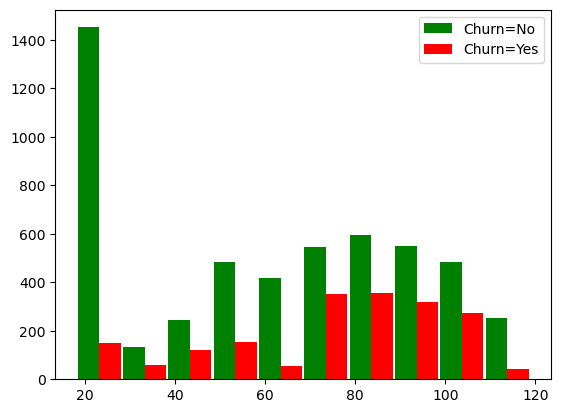

In [11]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_no,mc_churn_yes],rwidth=0.95,color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()

In [12]:
def print_unique_col_value(df):
    for col in df:
        print(f"{col}:{df[col].unique()}")

In [13]:
print_unique_col_value(df1)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

In [14]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No', inplace=True)

C:\Users\huyho\AppData\Local\Temp\ipykernel_12460\2453015552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\huyho\AppData\Local\Temp\ipykernel_12460\2453015552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True)


In [15]:
print_unique_col_value(df1)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:['No' 'Yes']


In [16]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)


C:\Users\huyho\AppData\Local\Temp\ipykernel_12460\1050031810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [17]:
print_unique_col_value(df1)

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [18]:
df1['gender'].replace({'Female':1,'Male':0}, inplace=True)

C:\Users\huyho\AppData\Local\Temp\ipykernel_12460\2821839192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0}, inplace=True)


In [19]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype='uint8')

In [20]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
df2.replace({'True':1,'False':0},inplace=True)

In [22]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [23]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [24]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2320,0,0,1,1,0.873239,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
6973,1,1,1,0,0.732394,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
2219,0,1,0,0,0.267606,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3221,0,0,0,0,0.028169,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5278,1,0,1,1,0.774648,1,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1


In [25]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [27]:
X_train.shape

(5625, 26)

In [28]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    #keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50)

C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.6184 - loss: 0.6434
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.7641 - loss: 0.4742
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7898 - loss: 0.4360
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7976 - loss: 0.4240
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7888 - loss: 0.4313
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.7993 - loss: 0.4234
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8135 - loss: 0.4044
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8019 - loss: 0.4119
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.8215 - loss: 0.3942
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8185 - loss: 0.3935
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8061 - loss: 0.4065
Epoch 12/50
176/176 ━━━━━━━━━━

In [29]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.7921 - loss: 0.4339


[0.44387128949165344, 0.7853589057922363]

In [30]:
yp = model.predict(X_test)
yp[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step


array([[0.1719498 ],
       [0.44499248],
       [0.01354081],
       [0.7333556 ],
       [0.5407016 ],
       [0.73176205],
       [0.12846069],
       [0.489353  ],
       [0.3384777 ],
       [0.15343347]], dtype=float32)

In [31]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [32]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       999
           1       0.68      0.49      0.57       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.77      0.79      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

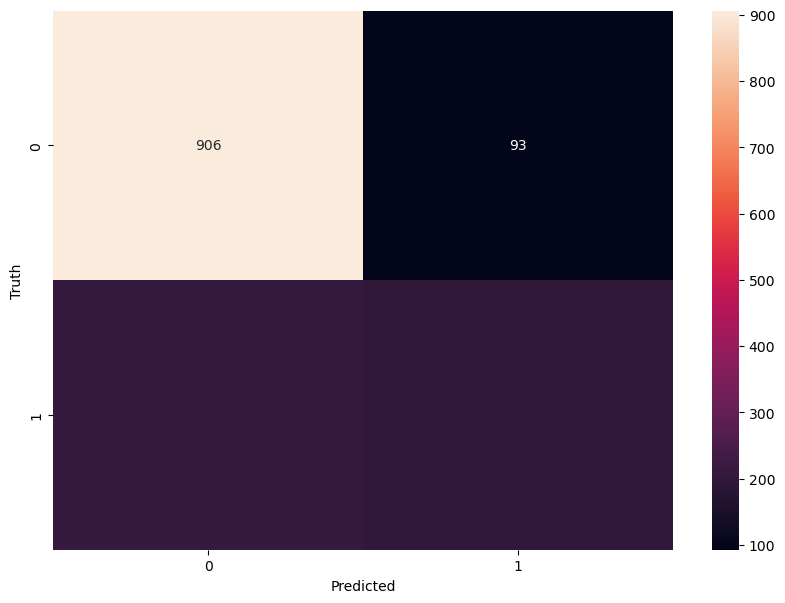

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight= weights)
    print(model.evaluate(X_test,y_test))
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification Report: \n", classification_report(y_test,y_preds))
    return y_preds

In [36]:
y_preds = ANN(X_train, y_train, X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.6577 - loss: 0.5853
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7904 - loss: 0.4383
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8057 - loss: 0.4137
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.8069 - loss: 0.4126
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.8054 - loss: 0.4160
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.8056 - loss: 0.4124
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8118 - loss: 0.4105
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8080 - loss: 0.4128
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.8067 - loss: 0.4116
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8077 - loss: 0.4082
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8219 - loss: 0.3881
Epoch 12/100
176/176 ━━━━━━━━━━

UNDERSAMPLING

In [37]:
df1.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [38]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [39]:
df_class_0.shape

(5163, 27)

In [40]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [41]:
print('Random under-sampling')
print(df_test_under.Churn.value_counts())

Random under-sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [42]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [43]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [44]:
y_preds = ANN(X_train,y_train, X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.6857 - loss: 0.6181
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7666 - loss: 0.4919
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.7651 - loss: 0.4884
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.7813 - loss: 0.4749
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7675 - loss: 0.4809
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.7681 - loss: 0.4895
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7773 - loss: 0.4794
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.7839 - loss: 0.4668
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.7791 - loss: 0.4700
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.7874 - loss: 0.4604
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7840 - loss: 0.4606
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step

OVERSAMPLING

In [45]:
count_class_0,count_class_1

(5163, 1869)

In [46]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
print('random over_sampling')
print(df_test_over.Churn.value_counts())

random over_sampling
Churn
0    5163
1    5163
Name: count, dtype: int64


In [47]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=14,stratify=y)

In [48]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [49]:
y_preds = ANN(X_train,y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.6790 - loss: 0.5998
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7584 - loss: 0.4950
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.7664 - loss: 0.4827
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.7617 - loss: 0.4900
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.7610 - loss: 0.4784
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.7632 - loss: 0.4834
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.7733 - loss: 0.4749
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.7714 - loss: 0.4694
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.7822 - loss: 0.4623
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7794 - loss: 0.4601
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7780 - loss: 0.4605
Epoch 12/100
259/259 ━━━━━━━━━━

SMOTE

In [50]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [51]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [55]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [57]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [58]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.6855 - loss: 0.5906
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.7788 - loss: 0.4740
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.7826 - loss: 0.4621
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.7825 - loss: 0.4649
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.7922 - loss: 0.4489
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7891 - loss: 0.4468
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7934 - loss: 0.4318
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.7863 - loss: 0.4519
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.8003 - loss: 0.4312
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8024 - loss: 0.4266
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.8108 - loss: 0.4238
Epoch 12/100
259/259 ━━━━━━━━━━

In [59]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)

In [62]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [63]:
df3 = X_train.copy()
df3['Churn'] = y_train

df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [64]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [70]:
df_train.shape

(2990, 27)

In [74]:
def get_train_batch(df_majority,df_minority,start, end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train = df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn

    return X_train, y_train
    

In [76]:
X_train, y_train = get_train_batch(df3_class0,df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.5199 - loss: 0.6930
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.7426 - loss: 0.5487
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.7658 - loss: 0.4981
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7767 - loss: 0.4819
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.7768 - loss: 0.4785
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.7627 - loss: 0.4862
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7749 - loss: 0.4774
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7608 - loss: 0.5014
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7624 - loss: 0.4905
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7720 - loss: 0.4803
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.7825 - loss: 0.4609
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step

In [78]:
X_train, y_train = get_train_batch(df3_class0,df3_class1, 1495,2990 )
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.6053 - loss: 0.6564
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.7508 - loss: 0.5292
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.7582 - loss: 0.5107
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7648 - loss: 0.4953
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7760 - loss: 0.4728
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.7657 - loss: 0.4874
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.7656 - loss: 0.4834
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.7712 - loss: 0.4838
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7870 - loss: 0.4662
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.7651 - loss: 0.4780
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7644 - loss: 0.4768
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step

In [79]:
X_train, y_train = get_train_batch(df3_class0,df3_class1, 2990,4130 )
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100


C:\Users\huyho\anaconda3\envs\python-jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6353 - loss: 0.6342  
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7623 - loss: 0.5208
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.7794 - loss: 0.4837
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7640 - loss: 0.4824
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.7761 - loss: 0.4739
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.7793 - loss: 0.4717
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7652 - loss: 0.4891
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.7945 - loss: 0.4668
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7739 - loss: 0.4719
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7730 - loss: 0.4714  
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.4529
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - acc